# Block 43: Workshop
## Handwritten Digit Recognition Using TensorFlow Lite

### Problem Statement: 

Build a mobile-friendly neural network model using TensorFlow Lite to recognize and classify handwritten digits. 

### Background: 

Handwritten digit recognition is a classic problem in machine learning and deep learning. The MNIST dataset, which contains images of handwritten digits from 0 to 9, is widely used for training and testing models for this task. With the rise of mobile devices, there's a need for lightweight models that can run on a device with minimal computational resources. Using TensorFlow Lite, provide a solution for this by allowing the conversion of TensorFlow models to a format optimized for on-device applications. 

Tasks: 

- Import necessary libraries.
- Data Loading and Preprocessing: 
    - Load the MNIST dataset. 
    - Normalize the images so that pixel values are between 0 and 1. 
- Model Building and Training: 
    - Define a neural network model using TensorFlow/Keras. 
    - Compile the model, specifying an optimizer, loss function, and metrics. 
- Conversion to TensorFlow Lite: 
    - Convert the trained TensorFlow model to TensorFlow Lite format. 
    - Save the converted model to a file. 
- Testing and Visualization: 
    - Load a sample handwritten digit image from the test set. 
    - Preprocess the image to match the input format of the model. 
    - Use the TensorFlow Lite interpreter to predict the digit in the sample image.
    - Get input and output tensors and set the tensor to the input image.
    - Invoke the model and obtain the output of the model. 
    - Display the sample image and the model's prediction. 
- Interpretation: 
    - Compare the model's prediction with the actual label of the sample image to determine the accuracy of the model on this sample. 
    - Provide a brief interpretation of the results, discussing the model's performance and any observed discrepancies. 
    

In [103]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

2. Data Loading and Preprocessing
- Load the MNIST dataset.
- Normalize the images.

In [104]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Print the shapes of the datasets
print('Training data shape:', x_train.shape)
print('Test data shape:', x_test.shape)

print('Training data shape:', y_train.shape)
print('Test data shape:', y_test.shape)

y_train[0] # --> Scalar value, i.e. use sparse_categorical_crossentropy

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training data shape: (60000,)
Test data shape: (10000,)


5

3. Model Building and Training
- Define a neural network model using TensorFlow/Keras. 
- Compile the model, specifying an optimizer, loss function, and metrics.

In [105]:
model = tf.keras.Sequential([
    
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),  # Reshape to 28x28x1 for Conv2D
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),  # First convolutional layer
    layers.MaxPooling2D((2, 2)),  # First pooling layer
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  # Second convolutional layer
    layers.MaxPooling2D((2, 2)),  # Second pooling layer
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  # Third convolutional layer
    layers.MaxPooling2D((2, 2)),  # Third pooling layer
    layers.Flatten(input_shape=(28, 28)),  # Flatten the input images (28x28 pixels)
    layers.Dense(128, activation='relu'),   # First hidden layer with 128 neurons
    layers.Dense(64, activation='relu'),    # Second hidden layer with 64 neurons
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit)

])


model.compile(optimizer='adam',# Adam optimizer
              loss='sparse_categorical_crossentropy', # Loss function for multi-class classification
              metrics=['accuracy'])

model.summary()

# Train the model and store the training history
history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.1)

c:\Users\arado\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\arado\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,506 (541.04 KB)

 Trainable params: 138,506 (541.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8361 - loss: 0.4970 - val_accuracy: 0.9847 - val_loss: 0.0515
Epoch 2/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9841 - loss: 0.0506 - val_accuracy: 0.9905 - val_loss: 0.0341
Epoch 3/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9896 - loss: 0.0335 - val_accuracy: 0.9912 - val_loss: 0.0293


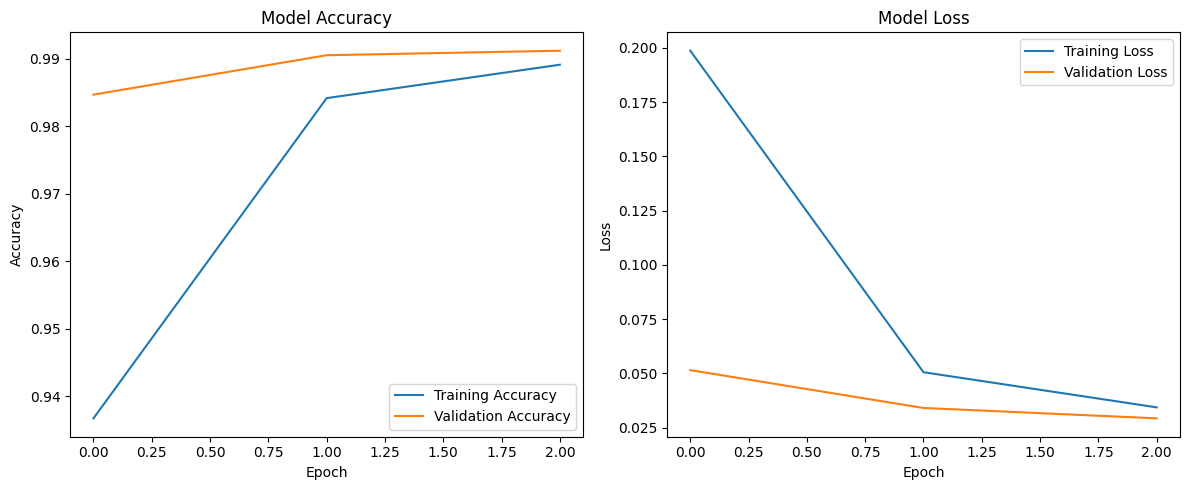

In [106]:
# Plotting the training and validation loss
plt.figure(figsize=(12, 5))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[ 966    0    0    0    0    0   14    0    0    0]
 [   0 1129    3    0    0    1    1    0    1    0]
 [   1    2 1025    0    0    0    1    3    0    0]
 [   0    0    4  992    0   13    0    0    1    0]
 [   0    0    2    0  964    0    6    1    3    6]
 [   1    0    0    1    0  889    1    0    0    0]
 [   1    2    0    0    0    3  951    0    1    0]
 [   0    5    4    1    0    0    0 1013    1    4]
 [   1    0    3    1    0    2    2    1  963    1]
 [   1    0    1    0    4    5    1    2    3  992]]


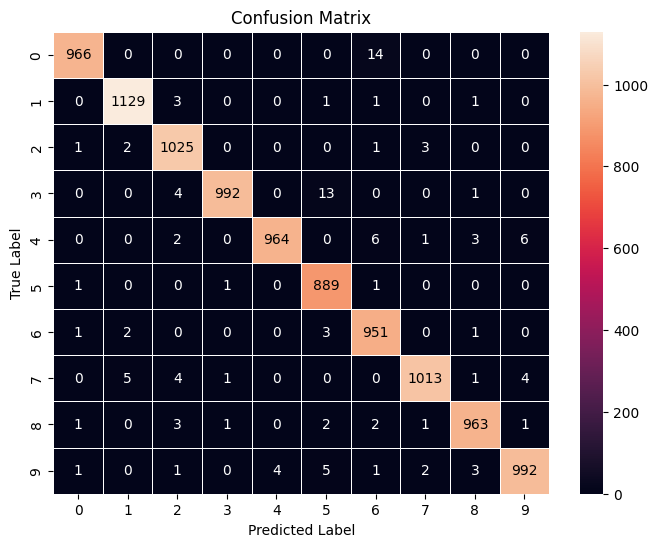

In [107]:
# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print(conf_matrix)
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix[:], annot=False, fmt='0.0f',cmap='rocket', cbar=True, robust=False, xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)], linewidth=.5)

# Annotate each cell in the confusion matrix
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        if i != j:
            ax.text(j + 0.5, i + 0.5, f'{conf_matrix[i, j]}', 
                    ha='center', va='center', color='white')
        else:
            ax.text(j + 0.5, i + 0.5, f'{conf_matrix[i, j]}', 
                    ha='center', va='center', color='black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [108]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test, y_pred_classes, target_names=[str(i) for i in range(10)])
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       1.00      0.98      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.97      1.00      0.99       892
           6       0.97      0.99      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [109]:
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability
print('True Label: ', y_test,' ### ', 'Predicted Label: ',y_pred_classes, )

True Label:  [7 2 1 ... 4 5 6]  ###  Predicted Label:  [7 2 1 ... 4 5 6]


4. Conversion to TensorFlow Lite
- Convert the trained TensorFlow model to TensorFlow Lite format. 
- Save the converted model to a file. 

In [110]:
# Create the TFLite converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # For Keras model
# converter = tf.lite.TFLiteConverter.from_saved_model('path_to_your_saved_model_directory')  # For SavedModel

# (Optional) Optimize the model
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # This line is optional for optimization

# Convert the model
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\arado\AppData\Local\Temp\tmp6adn9_zv\assets


INFO:tensorflow:Assets written to: C:\Users\arado\AppData\Local\Temp\tmp6adn9_zv\assets


Saved artifact at 'C:\Users\arado\AppData\Local\Temp\tmp6adn9_zv'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor_12')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1256093981984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1256093985504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1256093989200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1256093987440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1256093988320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1256093988848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1256093990080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1256093984096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1256094008592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1256094007536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  125609

In [111]:
# Save the converted model to a .tflite file
with open('converted_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model converted and saved as 'converted_model.tflite'")

Model converted and saved as 'converted_model.tflite'


5. Testing and Visualization
- Load a sample handwritten digit image from the test set. 
- Preprocess the image to match the input format of the model. 
- Use the TensorFlow Lite interpreter to predict the digit in the sample image.
- Get input and output tensors and set the tensor to the input image.
- Invoke the model and obtain the output of the model. 
- Display the sample image and the model's prediction. 

[[ 966    0    0    0    0    0   14    0    0    0]
 [   0 1129    3    0    0    1    1    0    1    0]
 [   1    2 1025    0    0    0    1    3    0    0]
 [   0    0    4  992    0   13    0    0    1    0]
 [   0    0    2    0  965    0    6    0    3    6]
 [   1    0    0    1    0  888    1    0    0    1]
 [   1    2    0    0    0    3  951    0    1    0]
 [   0    5    4    1    0    0    0 1013    1    4]
 [   1    0    3    1    0    2    2    1  963    1]
 [   1    0    1    0    4    4    1    2    4  992]]


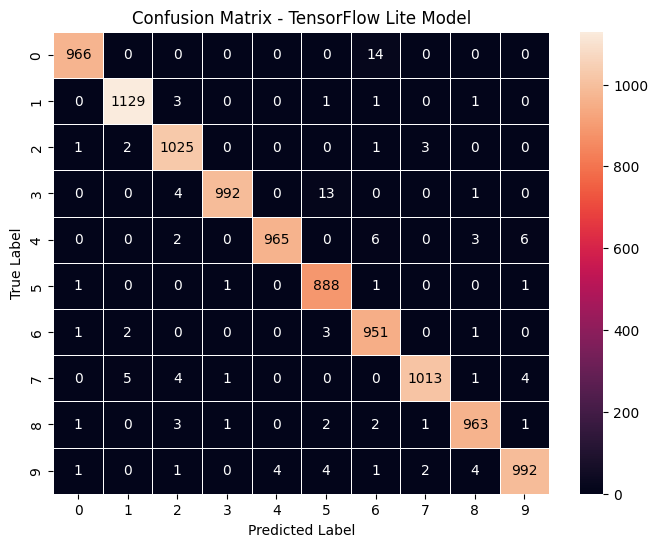

In [112]:
import numpy as np
import tensorflow as tf


# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='converted_model.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

true_label = [0]*10000
predicted_label = [0]*10000

for i in range(len(x_test)):
    # Prepare input data (replace with actual data)
    input_shape = input_details[0]['shape']
    input_data = np.array(x_test[i].reshape(1, 28, 28), dtype=np.float32)  # Adjust this as necessary

    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run the model
    interpreter.invoke()

    # Get the output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Print the predictions
    true_label[i] += y_test[i]
    predicted_label[i] += output_data.argmax()


# Compute the confusion matrix
conf_matrix = confusion_matrix(true_label, predicted_label)
print(conf_matrix)
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix[:], annot=False, fmt='0.0f',cmap='rocket', cbar=True, robust=False, xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)], linewidth=.5)

# Annotate each cell in the confusion matrix
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        if i != j:
            ax.text(j + 0.5, i + 0.5, f'{conf_matrix[i, j]}', 
                    ha='center', va='center', color='white')
        else:
            ax.text(j + 0.5, i + 0.5, f'{conf_matrix[i, j]}', 
                    ha='center', va='center', color='black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - TensorFlow Lite Model')
plt.show()

In [113]:
# Generate a classification report
report = classification_report(true_label, predicted_label, target_names=[str(i) for i in range(10)])
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       1.00      0.98      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.97      1.00      0.99       892
           6       0.97      0.99      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Final TFLite model is ~ 1/5 the diskspace with nearly the same level of accuracy as the original model